<a href="https://colab.research.google.com/github/kigit2017/FeatureSelection/blob/main/Featureselection_heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- feature selection is important for our data analysis beacuse it plays a crucial role in selecting a subset of the most relevant and important features (variables) from your dataset for further analysis or modeling.

By selectin ng proper feature we can improve model performance, recduce overfitting and enhancw the interpretability of results.

Step-Step- guid for feature selection :
1. Define Your problem:
    - Clearly understand your problem statement and the goals of your analysis.
    - Determine wether your problem is a classification , egression , clustering or other typeof problem
2. Data Collection and Exploration:
    - EDA we have use
    - using summary statistics, visulization and data visulization library we have to explore and find the insights from the data.

3. Under stand your feature:
    - Gain an understanding of each feature's meaning, relevance, and potential impact on the target varaibles.
    - identify categorical, numerical and other types of features/.

4. Data preprocessing:
    - Handle missing values by imputation or removing the affected samples
    - Deal with outliers, noise, and data anaomalies
    - Encode categorical variables using techniques, one-hot encoding , label encoder, pd.get_dummies.
    - Scale or normalize numberical features if needed.

5. Correlation Analysis:
    - Analyze the correlation between features and the target varaibles to identify potential predictors.
    - Calculate and visualize correlations using methods like pearson correlation or heatmap.

6. Feature Selection Techniques
  - There several techniques for feature selection
    - <b> Filter method </b> : Select features based on statistical metrics like correlation, mutal information or chi-sqaure test
    - Embedded methods : Feature selection is integrated with model training , like LASSO regression or decision trees.
    - Dimensionality Reduction : Technique like PCA,(principal component analysis) can be used ot reduce the dimensionality of the data.



### k-percentile Method
This statistical mehtod used to select the most informative featires based on their distribution or importance score. This mehtod involves selection featires that fall within a certain percentile range of importance.






In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
iris = load_iris()
X,y = iris.data, iris.target



rf_clas = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clas.fit(X,y)

RandomForestClassifier(random_state=42)

In [ ]:
iris = load_iris()
X,y = iris.data, iris.target

In [ ]:
# we will creat base random forest calssifier
rf_clas = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clas.fit(X,y)

RandomForestClassifier(random_state=42)

In [ ]:
# get feature improtance from the trained random fores
feat_imp = rf_clas.feature_importances_
# we will define the desire percentage range(percentile range)
percentile_r = (0, 50)


# calculate threshold importance value based on the percentile range
threshold = np.percentile(feat_imp, percentile_r[1])

# select feature that meet the threshold importance
selected_f = np.where(feat_imp >= threshold)
print(selected_f)

(array([2, 3]),)


### Random Forest RFE to eliminate one or more than one features
Idea behind the Random Forest RFE method
Random forest Recursive Feature Elimination (RF-RFE) is to combine the power of Random Forest , n ensemble learning algorithm, with recursive Features Elimination method, a feature selection technique. RF-REF aims to find the most important features within a dataset by iteratrely fittng Random Forest models and eliminating the least important features based on their importance scores,

Step-by-step logic behind RF-RFE:

1. Build Random Forest Model:
    - A random forest model is ensemble deicsion tree. Each tree is built on a different subset of the data and features
    - Random Forest provides a way to rank the importance of features by eveluating how much they contribute to reducing impurity (e.g Gini) in the decision trees.


2. Calculate Feature Importances:
    - After training the Random Forest, you can calculate the importance score for each feature.
    - Feature importance is determine by how much the impurity (or another metric) is reduced by a feature when it is used for splitting nodes in the decision trees.

3. Rank and Eliminate Features:
    - RF-RFE starts by training a Random Forest model using all available features
    - It ranks the features based on their importance score
    - It eliminates the least important features and repeate the process.
    - At each iteration , the model trains on the reduced set of features, adn the feature importance are calculated.
4. Stop criterion:
    - The RF-RFE process continues iteratively , removing one or more feaatures at each step, until a predefined number of feeature is reduced or the model performance stablizes.
    
5. Cross validation and selection ⁉
    - During the process, corss-validation is often used to evaluate the models performance after each feature elimination step.
    - The optimal number of features is determine based on cross-validation results, where the model achieves the best performance.

    <b> Advantages of using RF+RFE </b>

    It captures both the individual features importance and the interactions between features that Random Forest inherently capture.

    Theis lead to more robust and accurate feature selection, especially when dealing with complex dataset.

    Note : RF_RFE is poerful technique , it might be computatiionally expensive for larger datasets. Additionally the choice of the numbe rof features to eliminate at each step, as well as the stopping criteria , can impact the results.
    



In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
# Loat the dataset
iris = load_iris()
X,y = iris.data, iris.target

# we will split the data training and testing
train_X,test_X, train_y, test_y = train_test_split(X,y,random_state=42,test_size=.20)
rf_classi = RandomForestClassifier(n_estimators = 100, random_state=42)
# re-rfe
rfecv = RFECV(estimator=rf_classi, step = 1, cv = 5)

rfecv.fit(train_X,train_y)

print("optimal feature : %d" % rfecv.n_features_)
print("selected  features : %s" %str(rfecv.get_support))
print('Feature ranking: %s' % str(rfecv.ranking_))

# Transform the original data to the selected features
X_train_selected = rfecv.transform(train_X)
X_test_selected = rfecv.transform(test_X)


optimal feature : 2
selected  features : <bound method SelectorMixin.get_support of RFECV(cv=5, estimator=RandomForestClassifier(random_state=42))>
Feature ranking: [2 3 1 1]


we load the data <brr>
we split the data <br>
we create a base Random Forest classifier <br>
We create an RF-RFE selector ('RFECV') with the 'RandomForestClassifier' as the estimator.<br>
We fit RF_RFE selector on the trainin data.<br>
We print the optimal numnber of features, selected features mask('support_')<br> and feature ranking('ranking_')
We transform the original data into include only the selected features.





In [ ]:
# apply grid search CV method to find the best estimators.
#

In [ ]:
import pandas as pd
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data=pd.read_csv('./heart.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data[data['age']==52]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
45,52,1,1,120,325,0,1,172,0,0.2,2,0,2,1
55,52,1,1,134,201,0,1,158,0,0.8,2,1,2,1
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1,1
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2,1
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2,1
205,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0


In [ ]:
X=data.drop('output',axis=1)
y=data['output']

In [ ]:
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=.2,random_state=1)

Recursive feature elimination **with** cross validation

In [ ]:
rd_class = RandomForestClassifier(n_estimators=100,random_state=42)
rfecv= RFECV(estimator=rd_class,step=1,cv=5)
rd_model=rfecv.fit(train_X,train_y)
pred= rd_model.predict(test_X)
print("Optimal Feature %d "  %rfecv.n_features_)
print("Selected Feature %s" % str(rfecv.get_support))
print("Feature ranking %s" %str(rfecv.ranking_))

Optimal Feature 11 
Selected Feature <bound method SelectorMixin.get_support of RFECV(cv=5, estimator=RandomForestClassifier(random_state=42))>
Feature ranking [1 1 1 1 1 3 2 1 1 1 1 1 1]


In [ ]:
X_train_selected = rfecv.transform(train_X)
X_test_selected = rfecv.transform(test_X)
print(X_train_selected.shape)

(242, 11)


In [ ]:
X_train_selected[0]

array([ 52.,   1.,   3., 118., 186., 190.,   0.,   0.,   1.,   0.,   1.])

Using GridsearchCV to find the best parameters for Random classifier

In [ ]:
def gridSearch(x,y):
 params= {
    'n_estimators':[50,25,75],
    'criterion' : ['gini','entropy'],
    'max_depth':[3],'min_samples_split':[2]
    }
 grid=GridSearchCV(estimator=rd_class,param_grid=params,cv=5)
 train_X=x
 train_y=y
 grid.fit(train_X,train_y)
 print(grid.best_estimator_)

In [ ]:
rd_class1 = RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=75,
                       random_state=42)

rfecv1= RFECV(estimator=rd_class1,step=1,cv=5)
rd_model1=rfecv1.fit(train_X,train_y)
pred1= rd_model1.predict(test_X)
print("Optimal Feature %d "  % (rfecv1.n_features_))
print("Selected Feature %s" % str(rfecv1.get_support))
print("Feature ranking %s" % str(rfecv1.ranking_))

Optimal Feature 13 
Selected Feature <bound method SelectorMixin.get_support of RFECV(cv=5,
      estimator=RandomForestClassifier(criterion='entropy', max_depth=3,
                                       n_estimators=75, random_state=42))>
Feature ranking [1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(pred1,test_y))
print(confusion_matrix(pred1,test_y))


0.7704918032786885
[[20  4]
 [10 27]]


### Types of Feature selection methods in ML
- Filter Method
Filter method pick up the intrinsic property of the feature measured via univariate statistics intead of crossvalidation performance.
This is moputationally faster than wrapper method. When we will deal with high-dimensional data, than we use filter method for finding best feature

-- In this we will techniques
    - Information gain
    It calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the information gain of each variable in the context of the target variable.


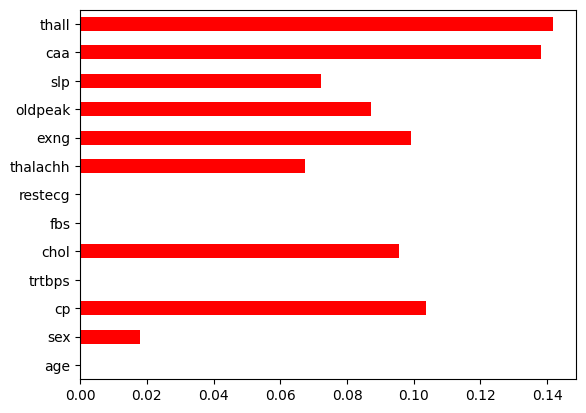

In [ ]:
from sklearn.feature_selection import mutual_info_classif## information gain
import matplotlib.pyplot as plt
%matplotlib inline
importances = mutual_info_classif(X,y)
feat_importances = pd.Series(importances,data.columns[0:len(data.columns)-1])
feat_importances.plot(kind = 'barh', color = 'red')
plt.show()

# Find accuracy by selecting the bst features mentioned in our graph

#### Chi-Square Test:
The chi-sqaure test is used for <b> categorical features </b> in a dataset. We calculate chi-sqaure between each feature and the target and select the desrie number of features with the best Chi-Square scores. In order to correctly appy the Chi-Square to test the relation between various features in the dataset and the target variable , the condition have to met


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# convert to categorical data by converting data to integers
X_cat = X.astype(int)
# three features with highest chi-sqaure statistics are selected
chi2_features = SelectKBest(chi2, k=5)
X_best_features = chi2_features.fit_transform(X_cat,y)

# Reduce the features
print('original features number:', X_cat.shape[1])
print('Reduceed feature number', X_best_features.shape[1])
#print(X_best_features)## prints data not column names
##################################################Get column names for X_cat below
col_ind =chi2_features.get_support(indices=True)
X_cat_new = (X_cat.columns[col_ind])# reduced feature columns
np.array((chi2_features.feature_names_in_))
#######################################################
rd_class1 = RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=75,
                       random_state=1)
train_x,test_x =train_test_split(X_cat[X_cat_new],test_size=.2,random_state=1)
train_y,test_y =train_test_split(y,test_size=.2,random_state=1)
#x_cat_new train = X_cat_new[]
model1 =rd_class1.fit(train_x,train_y)
y_pred= model1.predict(test_x)
print(y_pred.shape)
print(test_y.shape)
print("Accuracy score for Chi test",accuracy_score(y_pred,test_y))
print("Confusion matrix for Chi test",confusion_matrix(y_pred,test_y))
###########################################################
gridSearch(train_x,train_y)
rd_class_new=RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=25,
                       random_state=1)
model_grid = rd_class_new.fit(train_x,train_y)
y_pred= model_grid.predict(test_x)
print("Accuracy score for Chi test",accuracy_score(y_pred,test_y))
print("Confusion matrix for Chi test",confusion_matrix(y_pred,test_y))


# you have to convert array into dataframe format
# Than you have find the best colum names
#data.head()

original features number: 13
Reduceed feature number 5
(61,)
(61,)
Accuracy score for Chi test 0.7213114754098361
Confusion matrix for Chi test [[18  5]
 [12 26]]
RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=50,
                       random_state=42)
Accuracy score for Chi test 0.6885245901639344
Confusion matrix for Chi test [[18  7]
 [12 24]]


#### Fisher's Score:
Fisher's score is one of the feature selection technique used on supervies selection methods.
It return the rank of the variables on the fisher's descendinf order.



In [ ]:
!pip install skfeature-chappers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 1.7 MB/s eta 0:00:00


0 4
1 10
2 3
3 5
4 1
5 2
6 0
7 11
8 12
9 9
10 6
11 8
12 7


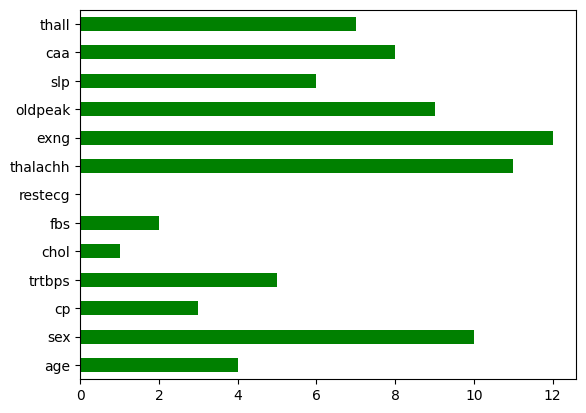

In [ ]:
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt
%matplotlib  inline
# Calculating score
ranks = fisher_score.fisher_score(np.array(X),np.array(y))
for f_i, rank in  enumerate(ranks):
  print(f_i,rank)

# Plotting the Rank
feat_importances = pd.Series(ranks, data.columns[0:len(data.columns)-1])
feat_importances.plot(kind = 'barh',color = 'green')
plt.show()

In [ ]:
import numpy as np
np.random.seed(42) #Dataset
Z = np.random.rand(100,5) # 100 sample ,5 features
w=  np.random.randint(2,size = 100) # Binary class labels

#
fisher_scores = fisher_score.fisher_score(Z,w)

for feature_idx, score in enumerate(fisher_scores):
  print(feature_idx, score)

0 1
1 2
2 3
3 0
4 4


### Correlation Coefficient:


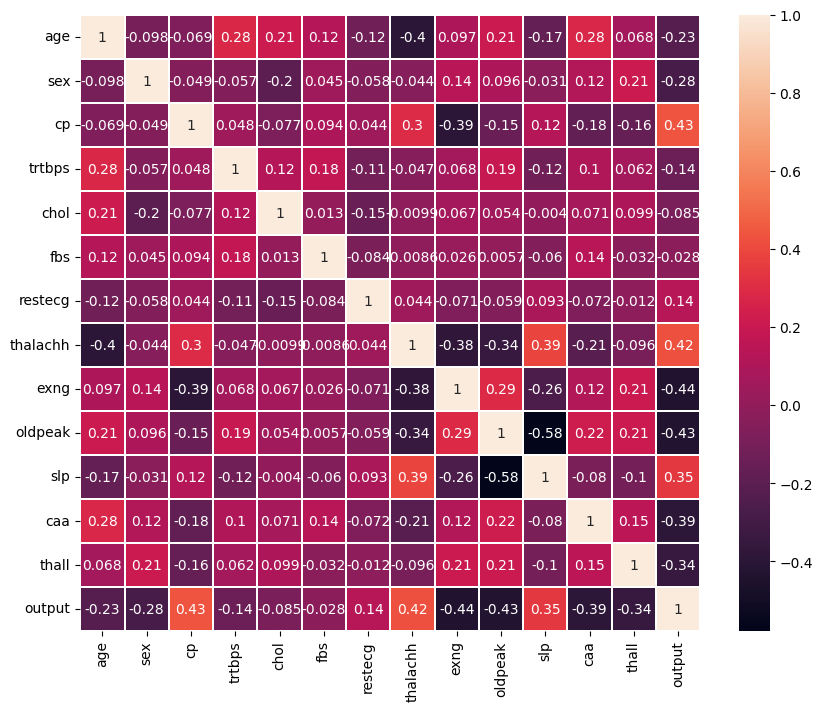

In [ ]:
import seaborn as sns
data_corr = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data_corr,annot=True,linewidths=.3,linecolor='white')
plt.show()

### Variance Threshold
The variance threshold is asimple baseline approach to feature selectiom. it removes the features whos variance doesn't meet  some threshold.
By default , it removes all zero-variance features i.e features with the same in all samples. We assume that features with a higer variance may contain more useful information, but note that we are not taking the relatioship between feature variables or feature and target variables into account, whihc is one of the drawback of filter method.


In [ ]:
from sklearn.feature_selection import VarianceThreshold

# we will reset the value
# we will make x to make it non-categorical
v_threshold = VarianceThreshold(threshold = 0)
v_threshold.fit(X) # fit finds the feature with 0 variance
v_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

The get_support returns a Boolean vector where True means the variable does not have 0 variance.


### Mean Absolute difference


<BarContainer object of 13 artists>

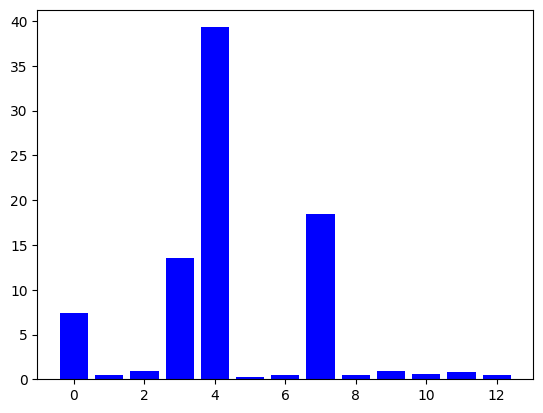

In [ ]:
mean_abs_dif = np.sum(np.abs(X-np.mean(X, axis = 0)), axis = 0)/X.shape[0]

# Plot the bar chart
plt.bar(np.arange(X.shape[1]), mean_abs_dif, color = 'blue' )

### Dispersion Ration

it applies the arithmetic mean (AM) and the geometric mean (GM). For a given(+ve) features Xi on n patterns , the AM, and GM are below.

Dispersion can be usd as a dispersion measure. Higher dispersion implies a higher vlaue of Ri , thus a more relevant features. Conversely when all the feature samples have (roughly) the same value, Ri is close to 1, indicationg a low relevance features [1]



In [ ]:
#import numpy as np
#X = np.sum(X,1) #to avoid o for denominator
X= X +1
# AM
am = np.mean(X, axis = 0)
# GM
gm = np.power(np.prod(X, axis = 0), 1/X.shape[0])
print(am)
print(gm)
# Ratio of Arthematic mean and geometric means
disp_ratio = am/gm
print(disp_ratio)
#print(X.shape)
# Plotting the bar chart
#plt.bar(np.arange(X.shape[0]), disp_ratio, color = 'Blue')

age          55.366337
sex           1.683168
cp            1.966997
trtbps      132.623762
chol        247.264026
fbs           1.148515
restecg       1.528053
thalachh    150.646865
exng          1.326733
oldpeak       2.039604
slp           2.399340
caa           1.729373
thall         3.313531
dtype: float64
age         0.000000
sex         0.000000
cp          0.000000
trtbps           NaN
chol        0.000000
fbs         1.108428
restecg     0.000000
thalachh    0.000000
exng        0.000000
oldpeak     1.768168
slp         0.000000
caa         0.000000
thall       0.000000
dtype: float64
age              inf
sex              inf
cp               inf
trtbps           NaN
chol             inf
fbs         1.036166
restecg          inf
thalachh         inf
exng             inf
oldpeak     1.153512
slp              inf
caa              inf
thall            inf
dtype: float64


## Wrapper Method:
Used for feature selection technique i Machine learning. It used to evaluate the quality of different subsets of features.

In wrapper method , a subset of features is evaluated by training a machine learning model using that subset and measuring it's performance.
Using cross-validtion or other similar techniques.

### key Steps in wrapper method ⁉
- 1. Subset Generation : Create initial subsets of features(e.g start with a single feature and progressively add more).
- 2. Model training and eveluation : Train a machine learning model using each subset and evaluate its performance metrics included accuracy, precision, recall, F-score.

- 3.Selection Criterion : Choose a criterion to determine whihc subset of feature is the best.
This could be based on the highest accuracy, lowest error rate or tother relevant metrics.

- 4. Iterative Process :  Iterative through different subset of features , train models and evaluate performance until a stopping criterion is met

- 5. Final featrure Subset : Select the subset of feature that achieved the best performance based on the choosen elimination.

        <b> Popular Algoritm for wrapper methods </b>
      
- Recursive Feature Elimination (RFE) - Starts with all features and iteratively removes the least important features based on the models co-efficients , weights or feature importance scores.

- Forward Selection : Starts with an empty set of features and incrementally adds the most relevant feature at each step, absed on the model's performacne.

 - Backward elimination : Starts with all features and iteratively removes the least relevatn features at each step, again based on the model's performance.

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=.2,random_state=1)
# Forward Feature selection
from mlxtend.feature_selection import SequentialFeatureSelector
ffs = SequentialFeatureSelector(lr,k_features='best', forward = True, n_jobs = -1)
ffs.fit(train_X,train_y)
print(train_X.shape,train_y.shape)
feature_index = ffs.k_feature_idx_
print(list(feature_index))
features=X.iloc[:,list(feature_index) ]
#train_X.columns.drop(train_X.index !=feature_index)
#features = list(map(int, features))
print(y.shape)
print(features.shape)
train_X,test_X,train_y,test_y = train_test_split(features,y,test_size=.2,random_state=1)
print(train_X.shape,train_y.shape)

model_new =lr.fit(train_X, train_y)
y_pred = model_new.predict(test_X)
print(y_pred.shape)
print(test_y.shape)
print("accuracy",accuracy_score(np.round(y_pred),test_y))# round values to compare with 0,1 outcome

(242, 13) (242,)
[0, 1, 2, 3, 6, 8, 9, 10, 11, 12]
(303,)
(303, 10)
(242, 10) (242,)
(61,)
(61,)
accuracy 0.7377049180327869


In [ ]:
## Rcursive fearure elimination
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=.2,random_state=1)
rfe = RFE(lr, n_features_to_select = 7)
rfe.fit(train_X, train_y)
feature_index= rfe.get_support(indices=True)
features=X.iloc[:,list(feature_index) ]
y_pred = rfe.predict(test_X)
y_pred
mse =  mean_squared_error(test_y, y_pred)##
##sum of average of squares of(y - yhat)
print(mse)

0.17232730643211133
